## **STUDENT MENTAL HEALTH CLASSIFICATION**

# **DATA:** This dataset was taken from kaggle which was gathered through a Google Forms survey given to university students to assess their mental and intellectual well-being at the moment.

# **PROBLEM:** I am trying to predict if the student will have panic attack or not on the basis of their academic performance.

# **FEATURES:**
   **Timestamp** - at what time information was collected
   
 **Choose your gender**- gender of the student(male or female)

 **Age**- Age of the student

 **What is your course?** - course in which student is enrolled

 **Your current year of Study** - in which year the student is


 **What is your CGPA?**- student' grade

 **Marital status**- student is married or not

 **Do you have Anxiety?** - student have anxiety or no

**Do you have Panic attack?** - student have panic attact or no


**Did you seek any specialist for a treatment?**-student seek any treatment no

In [1059]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [1060]:
data = pd.read_csv('Student Mental health.csv')

In [1061]:
data.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [1062]:
data.shape

(101, 11)

In [1063]:
data.dtypes

Timestamp                                        object
Choose your gender                               object
Age                                             float64
What is your course?                             object
Your current year of Study                       object
What is your CGPA?                               object
Marital status                                   object
Do you have Depression?                          object
Do you have Anxiety?                             object
Do you have Panic attack?                        object
Did you seek any specialist for a treatment?     object
dtype: object

In [1064]:
data.describe()

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


# **RENAMING FEATURES:**

renaming features for better understanding

In [1065]:
data.columns

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

In [1066]:
data.columns=['Timestamp','gender', 'Age', 'course',
       'Year_of_study','CGPA' ,'Marital_status',
       'Depression', 'Anxiety',
       'Panic_attack',
       'treatment']

# **CHECKING AND HANDLING MISSING VALUES:**

In [1067]:
data.isnull().sum()

Timestamp         0
gender            0
Age               1
course            0
Year_of_study     0
CGPA              0
Marital_status    0
Depression        0
Anxiety           0
Panic_attack      0
treatment         0
dtype: int64

In [1068]:
data['Age'] = data['Age'].fillna(data['Age'].mean())


In [1069]:
data.isnull().sum()

Timestamp         0
gender            0
Age               0
course            0
Year_of_study     0
CGPA              0
Marital_status    0
Depression        0
Anxiety           0
Panic_attack      0
treatment         0
dtype: int64

# **CHECKING DUPLICATE ROWS AND HANDLING(if any):**

In [1070]:
data.duplicated().sum()

0

# **FEATURE SELECTION:**

Dropping features which are  not important for my problem

In [1071]:
data.drop(columns=['Timestamp','Anxiety','treatment'],inplace=True)

In [1072]:
data.head()

,gender,Age,course,Year_of_study,CGPA,Marital_status,Depression,Panic_attack
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,Yes
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No


In [1073]:
data.dtypes

gender             object
Age               float64
course             object
Year_of_study      object
CGPA               object
Marital_status     object
Depression         object
Panic_attack       object
dtype: object

# **HANDLING OTHER INCONSISTENCIES IN DATA:**

Here, I am checking the unique values of categorical coloumns and after reviewing i found that there are some naming problems which add inconsistencies. So, I am replacing them.

In [1074]:
categorical_col= data.drop(columns=['Age']).columns
for i in categorical_col:
  print(f"Unique values of column {i}: {data[i].unique()}")

Unique values of column gender: ['Female' 'Male']
Unique values of column course: ['Engineering' 'Islamic education' 'BIT' 'Laws' 'Mathemathics'
 'Pendidikan islam' 'BCS' 'Human Resources' 'Irkhs' 'Psychology' 'KENMS'
 'Accounting ' 'ENM' 'Marine science' 'KOE' 'Banking Studies'
 'Business Administration' 'Law' 'KIRKHS' 'Usuluddin ' 'TAASL' 'Engine'
 'ALA' 'Biomedical science' 'koe' 'Kirkhs' 'BENL' 'Benl' 'IT' 'CTS'
 'engin' 'Econs' 'MHSC' 'Malcom' 'Kop' 'Human Sciences ' 'Biotechnology'
 'Communication ' 'Diploma Nursing' 'Pendidikan Islam ' 'Radiography'
 'psychology' 'Fiqh fatwa ' 'DIPLOMA TESL' 'Koe' 'Fiqh'
 'Islamic Education' 'Nursing ' 'Pendidikan Islam']
Unique values of column Year_of_study: ['year 1' 'year 2' 'Year 1' 'year 3' 'year 4' 'Year 2' 'Year 3']
Unique values of column CGPA: ['3.00 - 3.49' '3.50 - 4.00' '3.50 - 4.00 ' '2.50 - 2.99' '2.00 - 2.49'
 '0 - 1.99']
Unique values of column Marital_status: ['No' 'Yes']
Unique values of column Depression: ['Yes' 'No']
Unique v

In [1075]:
data.head()

,gender,Age,course,Year_of_study,CGPA,Marital_status,Depression,Panic_attack
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,Yes
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No


In [1076]:
course_dic = {'engin': 'Engineering' , 'Engine':'Engineering' , 'Islamic education':'Islamic Education' ,
              'Pendidikan islam':'Pendidikan Islam' , 'BIT':'IT', 'psychology':'Psychology', 'koe': 'Koe',
              'Kirkhs': 'Irkhs', 'KIRKHS': 'Irkhs', 'Benl': 'BENL', 'Fiqh fatwa ': 'Fiqh', 'Laws': 'Law'}

data['course'].replace(course_dic,inplace=True)
data['course'].unique()

array(['Engineering', 'Islamic Education', 'IT', 'Law', 'Mathemathics',
       'Pendidikan Islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Usuluddin ',
       'TAASL', 'ALA', 'Biomedical science', 'Koe', 'BENL', 'CTS',
       'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ',
       'Biotechnology', 'Communication ', 'Diploma Nursing',
       'Pendidikan Islam ', 'Radiography', 'Fiqh', 'DIPLOMA TESL',
       'Nursing '], dtype=object)

In [1077]:
data['Year_of_study'] = data['Year_of_study'].apply(lambda x : int(x.split(' ')[-1]))
data['Year_of_study'].unique()

array([1, 2, 3, 4])

In [1078]:
data['CGPA'].replace({'3.50 - 4.00 ':"3.50 - 4.00" },inplace=True)
data['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49',
       '0 - 1.99'], dtype=object)

# **CHANGING DATATYPES**

In [1079]:

for x in categorical_col:
  category_type = pd.CategoricalDtype(categories=data[x].unique())
  data[x] = data[x].astype(category_type)

# **DATA VISUALISATION:**

<Axes: xlabel='gender', ylabel='count'>

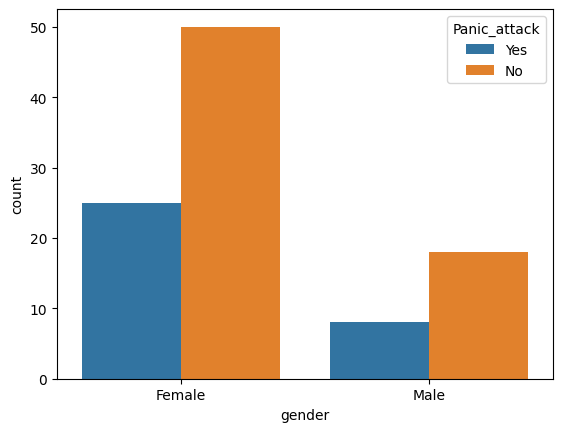

In [1080]:
sns.countplot(x='gender',hue='Panic_attack',data=data)

Females tend to have more panic attacks than males.

<Axes: xlabel='Marital_status', ylabel='count'>

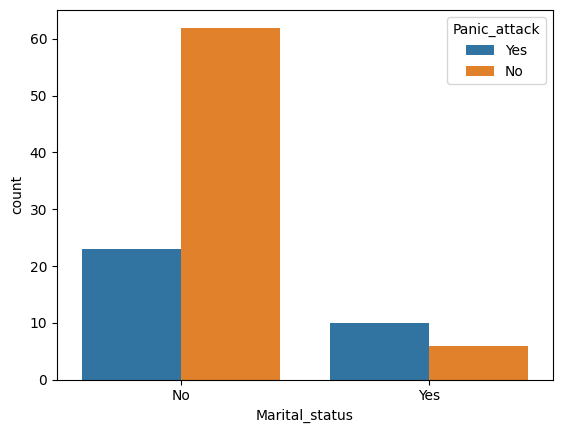

In [1081]:
 sns.countplot(x="Marital_status", hue= 'Panic_attack',data=data)

students who are single have higher chances of having anxiety

<Axes: xlabel='Year_of_study', ylabel='count'>

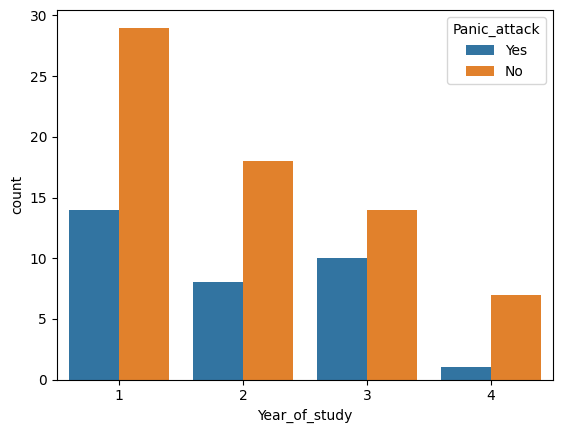

In [1082]:
 sns.countplot(x= 'Year_of_study', hue='Panic_attack',data=data)

students who are in first year have higher chances of having panic atacks

<Axes: xlabel='CGPA', ylabel='count'>

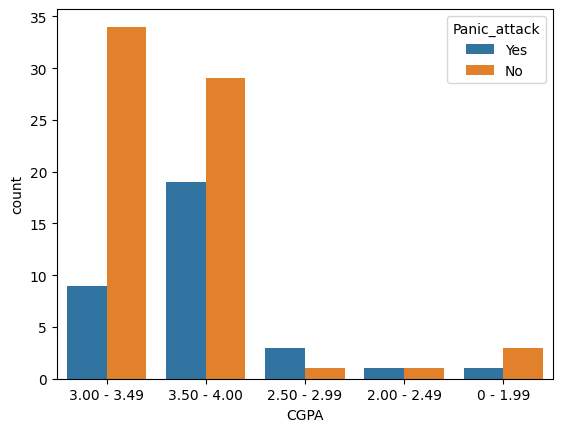

In [1083]:
sns.countplot(x="CGPA", hue='Panic_attack',data=data)

student with good gpa i.e. 3.50-4.00 tend to have more panic attacks

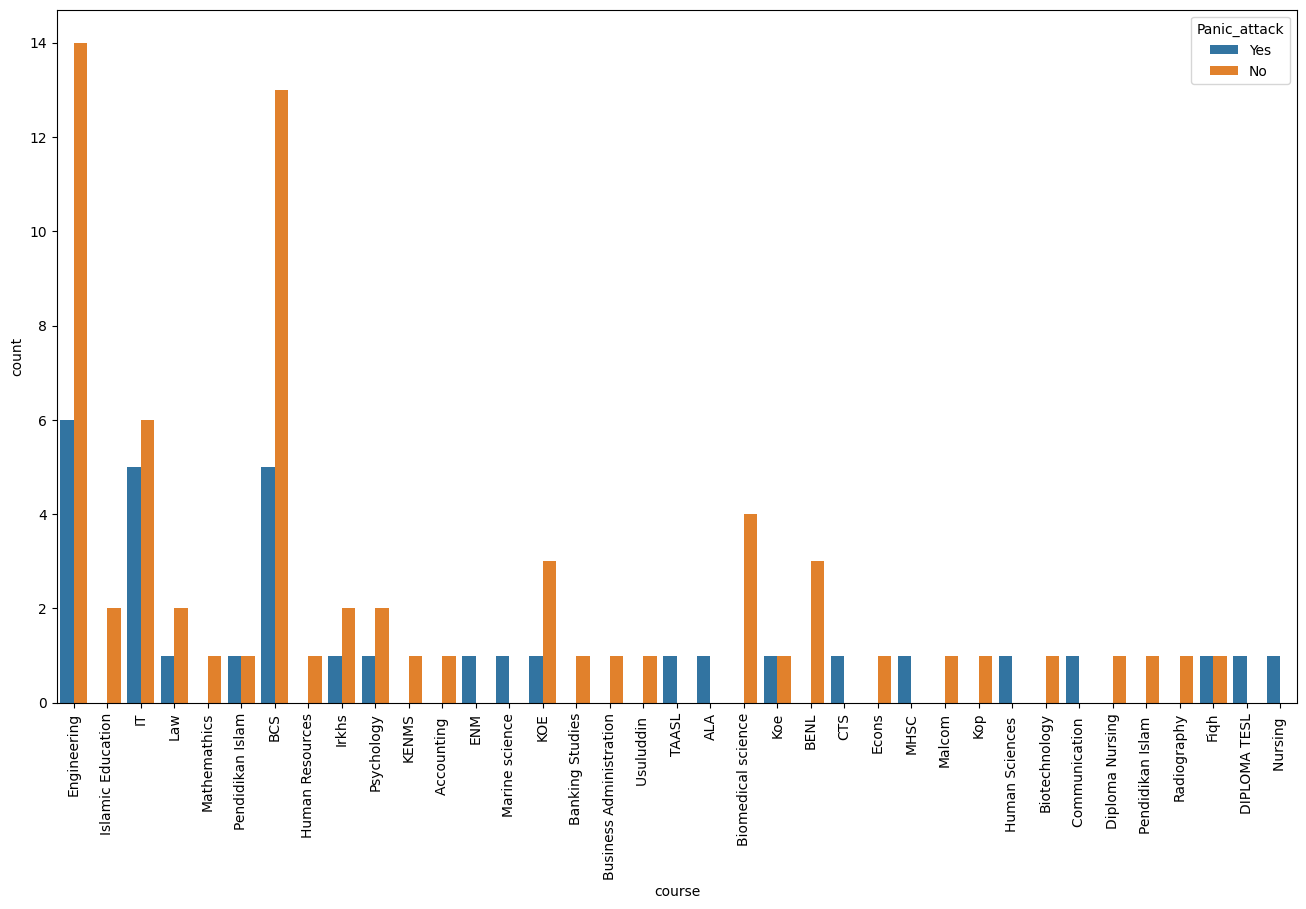

In [1084]:
plt.subplots(figsize=(16,9))
sns.countplot(x="course", hue='Panic_attack',data=data)
plt.xticks(rotation=90)
plt.show()

students with courses engineering and BCS have more panic attacks

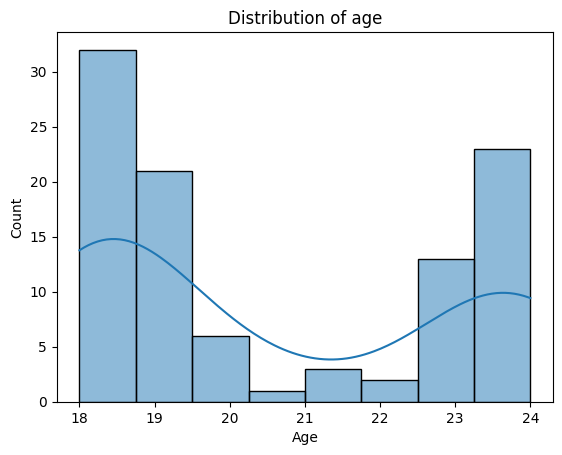

In [1085]:
sns.histplot(data=data, x='Age', kde=True)
plt.title("Distribution of age")
plt.show()


# **DATA ENCODING:**

In [1086]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for column in categorical_col:
    data[column] = label_encoder.fit_transform(data[column])

# **NORMALIZING NUMERIC FEATURES:**

There is only one numeric feature that is age. So, I am normalizing to make the values in range of 0 to 1.

In [1087]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['Age'] = scaler.fit_transform(data[['Age']])


In [1088]:
data.head()

,gender,Age,course,Year_of_study,CGPA,Marital_status,Depression,Panic_attack
0,0,0.000000,14,0,3,0,1,1
1,1,0.500000,20,1,3,0,0,0
2,1,0.166667,18,0,3,0,1,1
3,0,0.666667,25,2,3,1,1,0
4,1,0.833333,29,3,3,0,0,0


# **SELECTING TARGET AND FEATURES FOR MY PROBLEM:**

In [1089]:
X = data.drop(columns=['Panic_attack'], axis=1)
y = data['Panic_attack']

# **SPLITTING DATA**

In [1090]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **ML MODELLING**

# 1. RANDON FOREST CLASSIFIER

In [1091]:
RandomForest_model= RandomForestClassifier()
RandomForest_model.fit(X_train,y_train)

RandomForestClassifier()

In [1092]:
y_predict=RandomForest_model.predict(X_test)

In [1093]:
# Evaluating the model(finding accuracy)
print(f"Accuracy for random forest classifier model: {accuracy_score(y_test,y_predict)}")

Accuracy for random forest classifier model: 0.7619047619047619


In [1094]:
#Generating and printing a classification report for evaluating the model
report_randomF = classification_report(y_test, y_predict)
#report
print("Classification Report of random forest model:\n", report_randomF)

Classification Report of random forest model:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86        15
           1       1.00      0.17      0.29         6

    accuracy                           0.76        21
   macro avg       0.88      0.58      0.57        21
weighted avg       0.82      0.76      0.69        21



# 2. DECISION TREE CLASSIFIER

In [1095]:
decision_tree = DecisionTreeClassifier()

In [1096]:
decision_tree.fit(X_train,y_train)
#Predicting on test data
y_prediction= decision_tree.predict(X_test)
#Evaluating the model
print(f"Accuracy for Decision tree classifier model: {accuracy_score(y_test,y_prediction)}")

Accuracy for Decision tree classifier model: 0.6666666666666666


In [1097]:
#Generating and printing a classification report for evaluating the model
report_dt = classification_report(y_test, y_prediction)
#report
print("Classification Report of decision tree model:\n", report_dt)

Classification Report of decision tree model:
               precision    recall  f1-score   support

           0       0.79      0.73      0.76        15
           1       0.43      0.50      0.46         6

    accuracy                           0.67        21
   macro avg       0.61      0.62      0.61        21
weighted avg       0.68      0.67      0.67        21



# 3. K NEIGHBOURS CLASSIFIER

In [1098]:
Knn_model= KNeighborsClassifier()
Knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [1099]:
y_pre=Knn_model.predict(X_test)
print(f"Accuracy for knn classifier model: {accuracy_score(y_test,y_pre)}")
class_report=classification_report(y_test,y_pre)
print('Classification report of knn model: \n', class_report)

Accuracy for knn classifier model: 0.6190476190476191
Classification report of knn model: 
               precision    recall  f1-score   support

           0       0.68      0.87      0.76        15
           1       0.00      0.00      0.00         6

    accuracy                           0.62        21
   macro avg       0.34      0.43      0.38        21
weighted avg       0.49      0.62      0.55        21



RANDOM FOREST CLASSIFIER IS PERFORMING BEST AMONG OTHER ML MODELS.